In this notebook we'll cover the concept of clustering which is an unsupervised learning algorithm. We'll use the simple k-means algorithm that is part of the mltools package. 

The concept of k-means is simple. We're going to try to find k centers to describes all the points in the space. We are going to do this iteratively by computing all the "distances" to the centers, assigning each point with the closest centroid and then moving the centroids so it'll fit the data better.

I know this is pretty much the worst explanation ever, so go to the wiki [page](https://en.wikipedia.org/wiki/K-means_clustering), It's really good there and there are animations too!!! :)

In [5]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.datagen

np.random.seed(0)
%matplotlib inline

### mltools.cluster.kmeans

    """
	Perform K-means clustering on data X.

	Parameters
	----------
	X : numpy array
		N x M array containing data to be clustered.
	K : int
		Number of clusters.
	init : str or array (optional)
		Either a K x N numpy array containing initial clusters, or
		one of the following strings that specifies a cluster init
		method: 'random' (K random data points (uniformly) as clusters),
		'farthest' (choose cluster 1 uniformly, then the point farthest
		from all cluster so far, etc.), or 'k++' (choose cluster 1 
		uniformly, then points randomly proportional to distance from
		current clusters).
	max_iter : int (optional)
		Maximum number of optimization iterations.

	Returns (as tuple)
	-------
	z    : N x 1 array containing cluster numbers of data at indices in X.
	c    : K x M array of cluster centers.
	sumd : (scalar) sum of squared euclidean distances.
	"""

## 2-D data
The most intuative way to see K-means is in a 2-dimensional space. So let's start with a simple example.
We'll generate random data with 3 classes and fit the k-means algorithm to it.

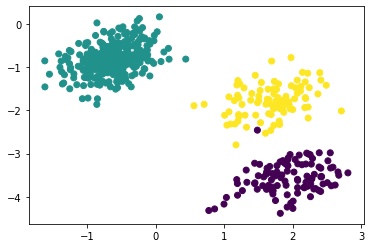

In [6]:
np.random.seed(1)
X,Y = ml.datagen.data_GMM(500, 3, get_Z=True) # Random data distribution 

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

## Learning K-means
Use K Means algorithm to find clusters. Note that we need to tell algorithm how many clusters to find.

In [7]:
n_clusters = 3
Z, mu, ssd = ml.cluster.kmeans(X, K=n_clusters, init='k++', max_iter=100)

Once clusters are found, each point in the data is classified as the class of the nearest centroid. In our case there are 3 of them. And obviously there could be mistakes.

In [8]:
mu

array([[-0.63553309, -0.81496131],
       [ 1.9462088 , -3.56709464],
       [ 1.69723642, -1.7766062 ]])

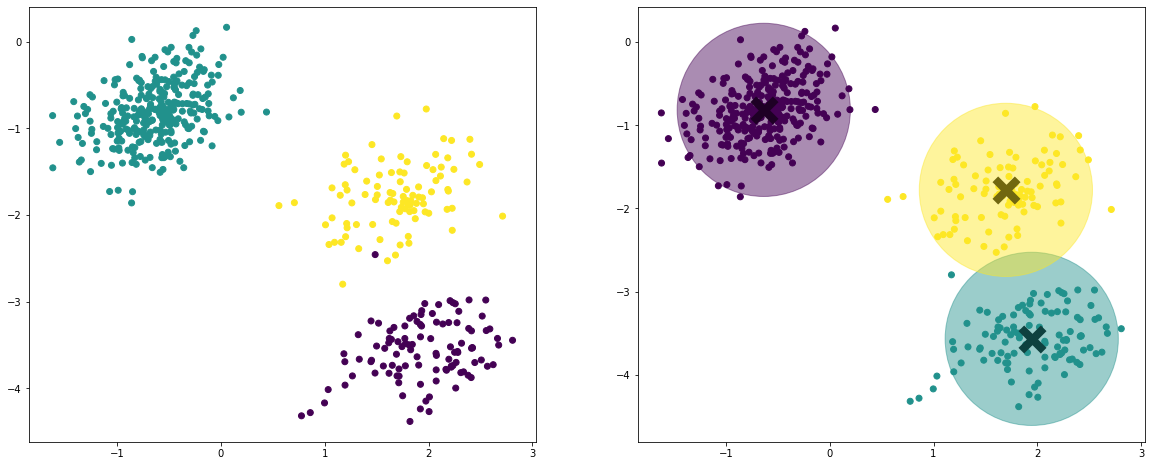

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Plotting the original data
ax[0].scatter(X[:, 0], X[:, 1], c=Y)

# Plotting the clustered data
ax[1].scatter(X[:, 0], X[:, 1], c=Z) # Plotting the data
ax[1].scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
ax[1].scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z)) # Lazy way of plotting the clusters area :)

plt.show()

## Important
This is an <b>unsupervised</b> learning algorithm. It did not know the identity of the classes before hand so the fact that some of you may get the same classes arrangment but with different colors is not important. In this case it means that the yellow could have easily been on the top left and it will still mean the same thing.

## Using K-means for classification.
K-means can also be used to classify new test points.

## How?

In [10]:
cluster_KNN = ml.knn.knnClassify(mu, np.arange(n_clusters), 1)
c = cluster_KNN.predict(X)

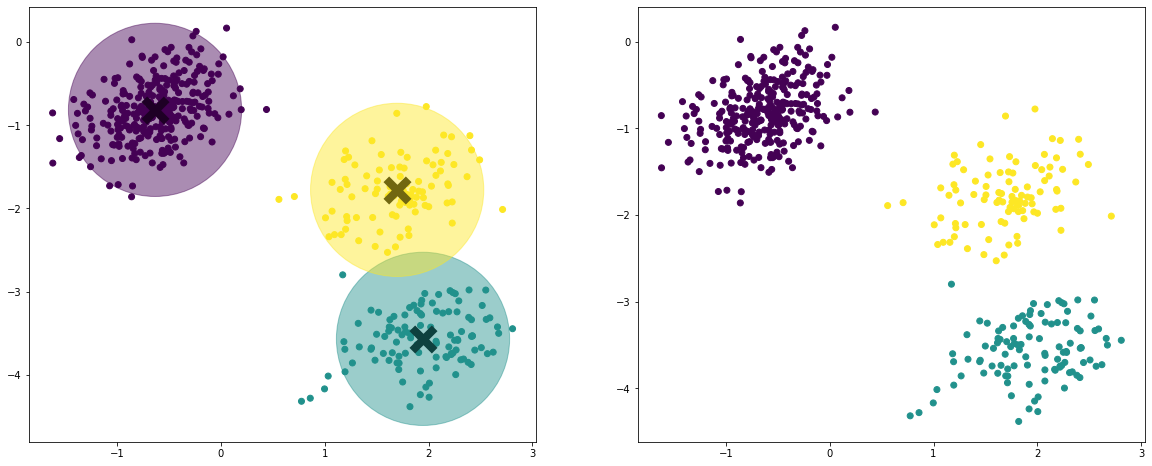

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Plotting the clustered data
ax[0].scatter(X[:, 0], X[:, 1], c=Z) # Plotting the data
ax[0].scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
ax[0].scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z)) # Lazy way of plotting the clusters area :)

ax[1].scatter(X[:, 0], X[:, 1], c=c) # Plotting the data

plt.show()

# Clustering Human Faces
An interesting data set where each row is an image in gray scale of a face using 24 X 24 pixels with values between 0 to 255 where 0 is black and 255 is white in grayscale map.

We are going to use this data set to show that K-means clustering can work on any vector and it doesn't really have to be points in the continuous space like the example above.

In [13]:
X = np.genfromtxt("data_faces.txt", delimiter=None) # load face dataset 

Let's see what these faces look like:

In [14]:
X[0]

array([ 93.,  97.,  91.,  82.,  76.,  73.,  68.,  54.,  51.,  59.,  72.,
        79.,  78.,  71.,  61.,  55.,  58.,  49.,  47.,  40.,  37.,  32.,
        29.,  26.,  87.,  89.,  85.,  83.,  78.,  72.,  64.,  60.,  56.,
        56.,  70.,  73.,  74.,  68.,  63.,  64.,  56.,  52.,  47.,  43.,
        33.,  31.,  29.,  26.,  76.,  77.,  77.,  81.,  86.,  77.,  70.,
        67.,  57.,  57.,  67.,  72.,  73.,  67.,  37.,  27.,  56.,  54.,
        50.,  45.,  38.,  32.,  28.,  20.,  72.,  71.,  73.,  79.,  83.,
        80.,  75.,  72.,  69.,  71.,  79.,  77.,  70.,  63.,  21.,   8.,
        42.,  57.,  52.,  47.,  39.,  33.,  27.,   9.,  72.,  73.,  82.,
       112., 104.,  92.,  58.,  82., 113., 143., 143., 118.,  87.,  56.,
        27.,  10.,  27.,  53.,  50.,  46.,  40.,  34.,  19.,   8., 161.,
       186., 214., 182., 183., 141.,  75., 163., 221., 227., 227., 210.,
       180.,  65.,  15.,  12.,  38.,  75.,  52.,  50.,  43.,  36.,  12.,
        11., 228., 231., 234., 218., 167., 167., 12

In [15]:
X.shape

(4916, 576)

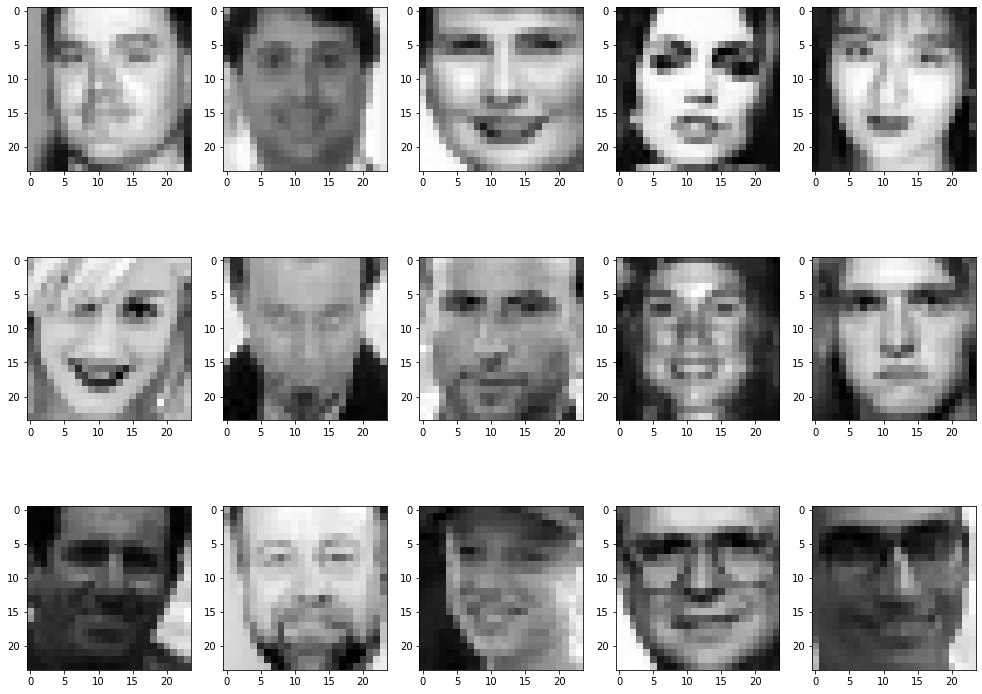

In [16]:
f, ax = plt.subplots(3, 5, figsize=(17, 13))
ax = ax.flatten()

# Plotting a random 15 faces
for j in range(15):
    i = np.random.randint(X.shape[0])
    img = np.reshape(X[i,:],(24,24))  # reshape flattened data into a 24*24 patch
    
    # We've seen the imshow method in the previous discussion :)
    ax[j].imshow( img.T , cmap="gray")
    
plt.show()

## K-means on faces

Using the K-means clustering methods we'll find k=15 groups of faces that are similar to one another. They similarity is in terms of grayscale values of each pixel. 

In [17]:
n_clusters = 10
Zi, mui, ssdi = ml.cluster.kmeans(X, K=n_clusters, init='k++')

## Plotting centroids

Funny enough, like we plotted the centroid in the 2d space, we can also plot the centroid in the "faces" domain.

### Before I run it, what will each centroid look like?


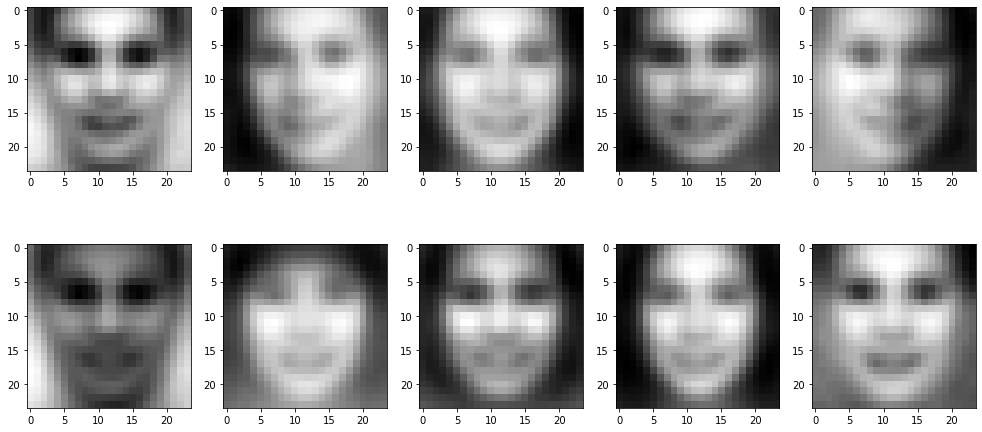

In [18]:
f, ax = plt.subplots(2, 5, figsize=(17, 8))
ax = ax.flatten()
for i in range(min(len(ax), n_clusters)):
    img = np.reshape(mui[i,:] ,(24, 24))
    ax[i].imshow(img.T , cmap="gray")
    
plt.show()

Each centroid is a kind of a blurry face. That is the mean average of that group and we can see that on average we all look the same genederless colorless face. Unless you have a mustache, then it depends on if you're looking to your left or to you right :) 